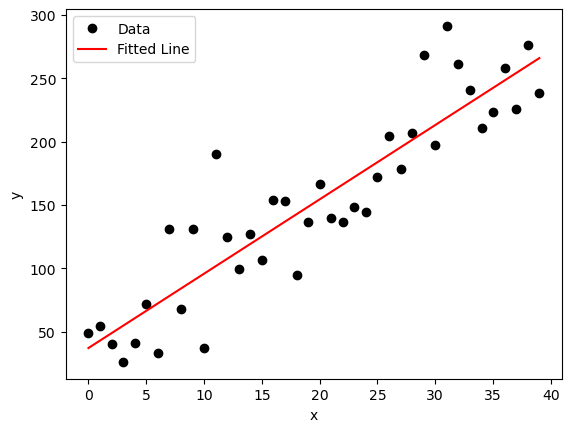

In [4]:
#simple fit without error bar
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
#set up 3 blank arrays to hold the data
x = [ ]
y = [ ]
dy = [ ] 
dummy = [ ]

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)
#read the data file and split it into 3 different arrays
file = open('data.txt', 'r')
for i in file:
    dummy = file.read().split()
i= 0
while i < len(dummy): #split the dummy array into it's respective x, y, and dy values
    if i%3 == 0:
        x.append(dummy[i])
    if i%3 == 1:
        y.append(dummy[i])
    if i%3 == 2:
        dy.append(dummy[i])
    i=i+1
# Convert x and y values to float (needed for the program to fit the data)
x = [float(val) for val in x]
y = [float(val) for val in y]

# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line = fit(line_init, x, y)
# Plot the model and the data
plt.figure()
plt.plot(x, y, 'ko', label='Data')  # Plot the data points
plt.plot(x, fitted_line(x), 'r-', label='Fitted Line')  # Plot the fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

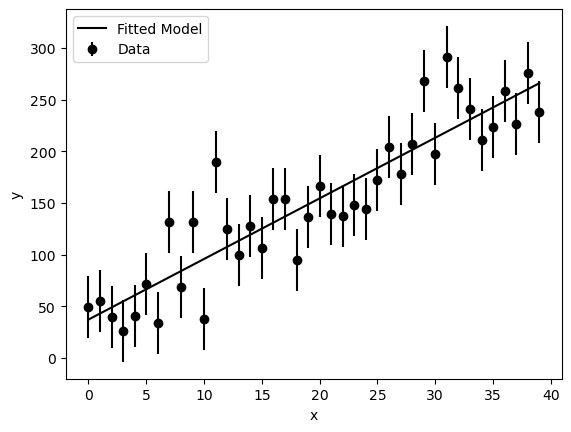

In [4]:
#simple fit wtih error bar
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
#set up 3 blank arrays to hold the data
x = [ ]
y = [ ]
dy = [ ] 
dummy = [ ]

# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)
#read the data file and split it into 3 different arrays
file = open('data.txt', 'r')
for i in file:
    dummy = file.read().split()
i= 0
while i < len(dummy): #split the dummy array into it's respective x, y, and dy values
    if i%3 == 0:
        x.append(dummy[i])
    if i%3 == 1:
        y.append(dummy[i])
    if i%3 == 2:
        dy.append(dummy[i])
    i=i+1
# Convert x, y, and dy values to float
x = [float(val) for val in x]
y = [float(val) for val in y]
dy = [float(val) for val in dy]
# initialize a linear fitter
fit = fitting.LinearLSQFitter()

# initialize a linear model
line_init = models.Linear1D()

# fit the data with the fitter
fitted_line = fit(line_init, x, y, weights=1.0/np.array(dy))

# plot
plt.figure()
plt.errorbar(x, y, yerr=dy, fmt='ko', label='Data')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

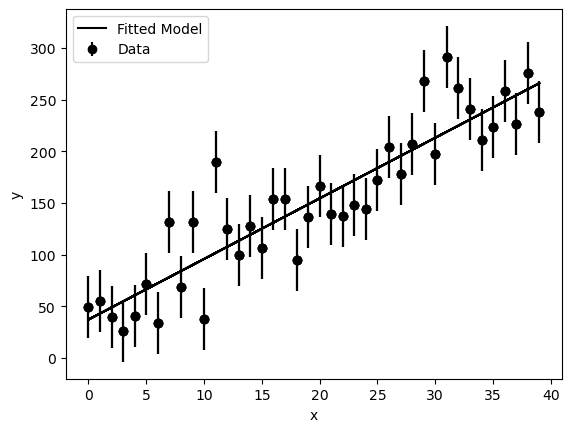

In [10]:
#small simplified program that fits user-inputted data
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
# define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)
def simple2Dplot(a, b, c): #codeset that reads 3 arrays and plot it
    x = [float(val) for val in a ]# Convert x, y, and dy values to float
    y = [float(val) for val in b]
    dy = [float(val) for val in c]
    fit = fitting.LinearLSQFitter() # initialize a linear fitter
    line_init = models.Linear1D() # initialize a linear model
    fitted_line = fit(line_init, x, y, weights=1.0/np.array(dy)) # fit the data with the fitter
    plt.figure() #plot the figure
    plt.errorbar(x, y, yerr=dy, fmt='ko', label='Data')
    plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    return
def readingprogram(a): #codeset that can read a simple text document and parse it into 3 arrays of x,y, and dy
    file = open(a, 'r')
    for i in file:
        dummy = file.read().split()
    i= 0
    while i < len(dummy): #split the dummy array into it's respective x, y, and dy values
        if i%3 == 0:
            x.append(dummy[i])
        if i%3 == 1:
            y.append(dummy[i])
        if i%3 == 2:
            dy.append(dummy[i])
        i=i+1
    return x,y,dy
readingprogram('data.txt')
simple2Dplot(x,y,dy)
